###Popularity Prediction: Use a decision tree classifier to predict whether an article will achieve high, medium, or low shares based on factors like content length, publication timing, and media elements.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

In [2]:
data=pd.read_csv('OnlineNewsPopularity.csv')

In [3]:
selected_features = [
    'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs', 
    'num_self_hrefs', 'num_imgs', 'num_videos', 'title_subjectivity', 
    'title_sentiment_polarity'
]

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1   timedelta                       39644 non-null  float64
 2   n_tokens_title                  39644 non-null  float64
 3   n_tokens_content                39644 non-null  float64
 4   n_unique_tokens                 39644 non-null  float64
 5   n_non_stop_words                39644 non-null  float64
 6   n_non_stop_unique_tokens        39644 non-null  float64
 7   num_hrefs                       39644 non-null  float64
 8   num_self_hrefs                  39644 non-null  float64
 9   num_imgs                        39644 non-null  float64
 10  num_videos                      39644 non-null  float64
 11  average_token_length            39644 non-null  float64
 12  num_keywords                    

In [31]:
data['n_tokens_title'].head(10)

0    12.0
1     9.0
2     9.0
3     9.0
4    13.0
5    10.0
6     8.0
7    12.0
8    11.0
9    10.0
Name: n_tokens_title, dtype: float64

In [4]:
X=data[selected_features]

In [5]:
# Define the threshold for "popularity" 
threshold = 1400
y = np.where(data['shares'] > threshold, 1, 0)  # 1 for popular, 0 for not popular

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [8]:
model = DecisionTreeClassifier(random_state=101)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [9]:
print(accuracy)

0.5131794677765166


In [10]:
print(report)

              precision    recall  f1-score   support

           0       0.51      0.52      0.52      3928
           1       0.52      0.50      0.51      4001

    accuracy                           0.51      7929
   macro avg       0.51      0.51      0.51      7929
weighted avg       0.51      0.51      0.51      7929



###Engagement Level Estimation: Apply linear regression to estimate the expected number of shares based on early article performance (e.g., initial comments or views).

In [11]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Prepare the feature set (X) and target variable (y)
X = data[selected_features]
y = data['shares']  # Engagement level represented by the number of shares

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 120087702.44225118
R-squared (R2): 0.004840666525527837


## Title Sentiment and Popularity: Use logistic regression to predict whether an article will be popular based on its title sentiment score.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# Select title sentiment features for popularity prediction
selected_features = ['title_sentiment_polarity', 'title_subjectivity']
X = data[selected_features]
threshold = 1400
y = np.where(data['shares'] > threshold, 1, 0)  # 1 for popular, 0 for not popular

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", report)


Model Accuracy: 0.5278093076049943

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.69      0.60      4075
           1       0.52      0.36      0.43      3854

    accuracy                           0.53      7929
   macro avg       0.53      0.52      0.51      7929
weighted avg       0.53      0.53      0.51      7929



**Predicting share count based on media element combinations (images, videos, links) in articles**

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Select features and target
X = data[['num_imgs', 'num_videos', 'num_hrefs']]
y = data['shares']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
r_squared = model.score(X_test, y_test)
print("R-squared value for media elements predicting shares:", r_squared)


R-squared value for media elements predicting shares: 0.0028297583473890775


**Keyword Frequency Impact: Apply linear regression to understand how keyword frequency affects article shares, helping identify optimal keyword usage.**

In [16]:
data.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       ' data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
    

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select columns related to keyword frequency and category
selected_features = [
    'kw_avg_avg',                   # Average keyword frequency across articles
    'data_channel_is_lifestyle',    # Article category: Lifestyle
    ' data_channel_is_entertainment', # Article category: Entertainment
    'data_channel_is_bus',     # Article category: Business
    'data_channel_is_socmed',       # Article category: Social Media
    'data_channel_is_tech',         # Article category: Tech
    'data_channel_is_world'         # Article category: World
]

# Prepare the feature set (X) and target variable (y)
X = data[selected_features]
y = data['shares']  # Engagement level represented by the number of shares

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 118723840.11594652
R-squared (R2): 0.01614290893664383


**Code for Rule-Based Correlation of Specific Phrases with Engagement**

In [32]:
import pandas as pd

proxy_columns = [
    'n_tokens_content',        # Content length as a proxy for structure
    'n_unique_tokens',         # Unique tokens as a proxy for diversity
    'n_non_stop_unique_tokens',# Non-stopword unique tokens as another diversity measure
    'num_imgs',                # Number of images as a structural element
    'num_videos',              # Number of videos as a structural element
    'shares'                   # Target variable for engagement
]

# Filter the dataset to include only these columns
proxy_data = data[proxy_columns]

# Calculate the correlation matrix
correlation_matrix = proxy_data.corr()

# Display the correlation matrix, focusing on correlation with 'shares'
print("Correlation Matrix with Shares:\n", correlation_matrix['shares'].sort_values(ascending=False))


Correlation Matrix with Shares:
 shares                      1.000000
num_imgs                    0.039388
num_videos                  0.023936
n_tokens_content            0.002459
n_unique_tokens             0.000806
n_non_stop_unique_tokens    0.000114
Name: shares, dtype: float64


**Comparison between LDA topics and shares**

In [34]:


# Select the LDA topic columns and the target engagement column ('shares')
lda_columns = ['LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'shares']

# Calculate the correlation matrix
correlation_matrix = data[lda_columns].corr()

# Display the correlation of each LDA topic with shares
print("Correlation of LDA Topics with Shares:\n", correlation_matrix['shares'].sort_values(ascending=False))


Correlation of LDA Topics with Shares:
 shares    1.000000
LDA_03    0.083771
LDA_01   -0.010183
LDA_04   -0.016622
LDA_02   -0.059163
Name: shares, dtype: float64


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report


# Use sentiment-related columns as features
# Adjust based on the available sentiment columns in your dataset
features = ['title_sentiment_polarity', 'title_subjectivity', 'global_sentiment_polarity']

# Define the target variable based on shares (e.g., positive feedback if shares > 1400)
threshold = 1400
data['feedback'] = (data['shares'] > threshold).astype(int)  # 1 for positive, 0 for negative

# Prepare the feature set (X) and target variable (y)
X = data[features]
y = data['feedback']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(y_pred)
print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", report)


[0 0 0 ... 0 0 0]
Model Accuracy: 0.5240257283390087

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.71      0.60      4075
           1       0.52      0.33      0.40      3854

    accuracy                           0.52      7929
   macro avg       0.52      0.52      0.50      7929
weighted avg       0.52      0.52      0.51      7929



c:\Users\adira\Desktop\Social_Media_Analysis\venv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\adira\Desktop\Social_Media_Analysis\venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


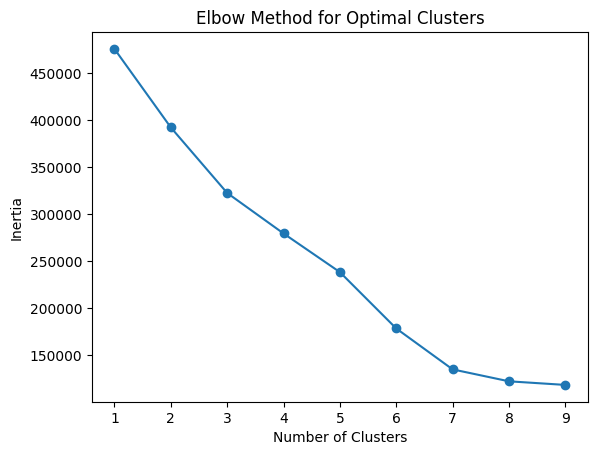


Cluster 0:
    data_channel_is_lifestyle   data_channel_is_entertainment  \
37                        0.0                             0.0   
73                        0.0                             0.0   
77                        0.0                             0.0   
78                        0.0                             0.0   
96                        0.0                             0.0   

    data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  \
37                  0.0                     1.0                   0.0   
73                  0.0                     1.0                   0.0   
77                  0.0                     1.0                   0.0   
78                  0.0                     1.0                   0.0   
96                  0.0                     1.0                   0.0   

    data_channel_is_world  title_sentiment_polarity  shares  
37                    0.0                      -0.5    2600  
73                    0.0         

In [41]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select features for clustering
# Here we use category indicators, sentiment scores, and LDA topic features
features = [
    'data_channel_is_lifestyle', ' data_channel_is_entertainment', 
    'data_channel_is_bus', 'data_channel_is_socmed', 
    'data_channel_is_tech', 'data_channel_is_world',
    'title_sentiment_polarity', 'global_sentiment_polarity',
    'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04'
]

# Prepare the feature set
X = data[features].fillna(0)  # Replace NaN values with 0 if any

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the number of clusters using the elbow method (optional)
inertia = []
for n in range(1, 10):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve to find the optimal number of clusters
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

# Apply K-means clustering with the selected number of clusters (e.g., 5)
kmeans = KMeans(n_clusters=5, random_state=42)
data['cluster'] = kmeans.fit_predict(X_scaled)

# Display a few sample articles from each cluster
for i in range(5):
    print(f"\nCluster {i}:")
    print(data[data['cluster'] == i][['data_channel_is_lifestyle', ' data_channel_is_entertainment', 
                                      'data_channel_is_bus', 'data_channel_is_socmed', 
                                      'data_channel_is_tech', 'data_channel_is_world', 
                                      'title_sentiment_polarity', 'shares']].head())


In [38]:
print(data.columns)

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       ' data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
    

**Day and Time Impact: Use linear regression to analyze how publishing day and time influence social media engagement, helping identify optimal posting times.**

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


features = [
    'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
    'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
    'weekday_is_sunday', 'is_weekend'
]

# Prepare the feature set (X) and target variable (y)
X = data[features]
y = data['shares']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

# Display the coefficients to interpret the impact of each day on engagement
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print("\nCoefficients:\n", coefficients)

# Identify optimal days for posting
# Sort coefficients to find the most positive (beneficial) days
sorted_coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print("\nOptimal Days for Posting (based on positive impact on shares):\n", sorted_coefficients)

Mean Squared Error (MSE): 120638327.67095472
R-squared (R2): 0.00027766944550333683

Coefficients:
                 Feature   Coefficient
0     weekday_is_monday -1.226522e+15
1    weekday_is_tuesday -1.226522e+15
2  weekday_is_wednesday -1.226522e+15
3   weekday_is_thursday -1.226522e+15
4     weekday_is_friday -1.226522e+15
5   weekday_is_saturday -3.944743e+15
6     weekday_is_sunday -3.944743e+15
7            is_weekend  2.718220e+15

Optimal Days for Posting (based on positive impact on shares):
                 Feature   Coefficient
7            is_weekend  2.718220e+15
0     weekday_is_monday -1.226522e+15
4     weekday_is_friday -1.226522e+15
2  weekday_is_wednesday -1.226522e+15
3   weekday_is_thursday -1.226522e+15
1    weekday_is_tuesday -1.226522e+15
5   weekday_is_saturday -3.944743e+15
6     weekday_is_sunday -3.944743e+15


**Category Engagement Patterns: Use decision trees to explore social media engagement patterns for different categories (e.g., Tech vs. Lifestyle) on weekdays vs. weekends.**

Model Accuracy: 0.6230293857989658

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.60      0.62      4075
           1       0.61      0.64      0.62      3854

    accuracy                           0.62      7929
   macro avg       0.62      0.62      0.62      7929
weighted avg       0.62      0.62      0.62      7929



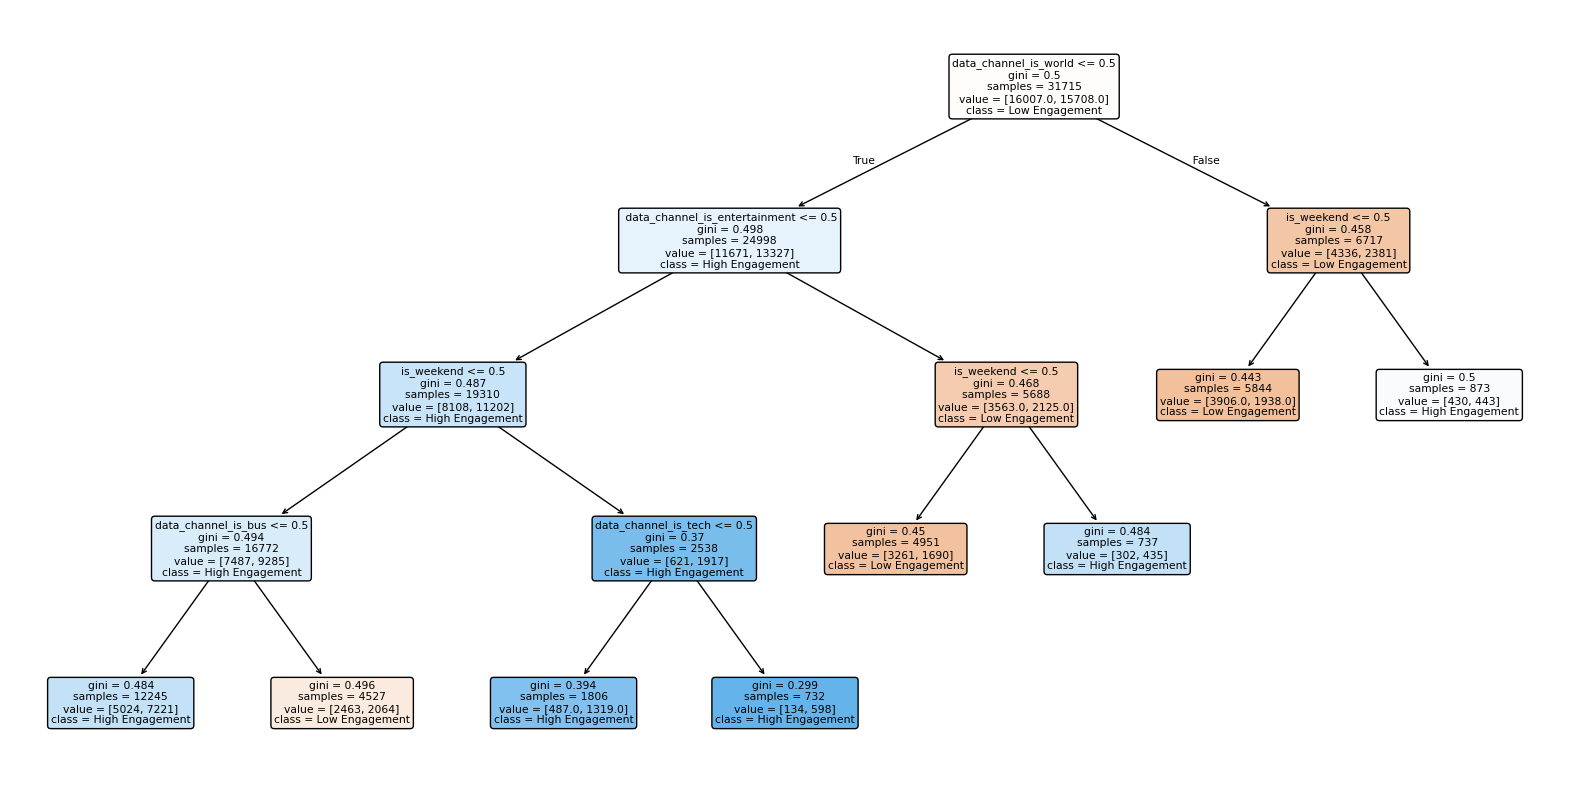

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define category indicators and 'is_weekend' as features
features = [
    'data_channel_is_lifestyle', ' data_channel_is_entertainment', 
    'data_channel_is_bus', 'data_channel_is_socmed', 
    'data_channel_is_tech', 'data_channel_is_world', 'is_weekend'
]

# Define high engagement vs. low engagement
# Set threshold for high engagement (e.g., articles with shares > 1400)
engagement_threshold = 1400
data['engagement_level'] = np.where(data['shares'] > engagement_threshold, 1, 0)  # 1 for high engagement, 0 for low engagement

# Prepare the feature set (X) and target variable (y)
X = data[features]
y = data['engagement_level']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree classifier
model = DecisionTreeClassifier(max_depth=4, random_state=42)  # max_depth is set for interpretability
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", report)

# Visualize the Decision Tree (Optional, if you want to interpret it visually)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=features, class_names=['Low Engagement', 'High Engagement'], filled=True, rounded=True)
plt.show()


**Content Element Association: Using associative learning (such as the Apriori algorithm), find patterns between content elements (e.g., keywords, images, and topics) that frequently co-occur in high-engagement articles. This could reveal combinations of elements that contribute to increased popularity.**

In [49]:
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 9.5 MB/s eta 0:00:00


In [50]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np


# Define high engagement articles (e.g., shares > 1400)
engagement_threshold = 1400
high_engagement_data = data[data['shares'] > engagement_threshold]

# Select relevant features for association analysis
# For this example, we will use keywords, images, and topics if available.
# Example columns might include 'num_imgs', 'lda_01', 'lda_02', 'lda_03', 'lda_04'
# Convert these columns into binary (0/1) format for presence/absence
features = ['num_imgs', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04']  # Modify based on available columns

# Convert numerical features into binary (0 = absence, 1 = presence)
# For example, consider 'num_imgs' > 0 as presence of images
for feature in features:
    high_engagement_data[feature] = np.where(high_engagement_data[feature] > 0, 1, 0)

# Prepare the data in a transactional format (1 for presence, 0 for absence)
transactions = high_engagement_data[features]

# Apply Apriori algorithm to find frequent itemsets
# Set a minimum support threshold (e.g., 0.1 = 10% of high-engagement articles)
frequent_itemsets = apriori(transactions, min_support=0.1, use_colnames=True)

# Generate association rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Filter rules by lift and confidence to find strong patterns
strong_rules = rules[(rules['lift'] > 1) & (rules['confidence'] > 0.6)]

# Display the frequent itemsets and association rules
print("Frequent Itemsets:\n", frequent_itemsets)
print("\nAssociation Rules:\n", strong_rules)


Frequent Itemsets:
      support                                    itemsets
0   0.822053                                  (num_imgs)
1   0.999949                                    (LDA_01)
2   0.999949                                    (LDA_02)
3   0.999949                                    (LDA_03)
4   0.999949                                    (LDA_04)
5   0.822002                          (num_imgs, LDA_01)
6   0.822002                          (LDA_02, num_imgs)
7   0.822002                          (LDA_03, num_imgs)
8   0.822002                          (LDA_04, num_imgs)
9   0.999949                            (LDA_02, LDA_01)
10  0.999949                            (LDA_03, LDA_01)
11  0.999949                            (LDA_04, LDA_01)
12  0.999949                            (LDA_03, LDA_02)
13  0.999949                            (LDA_04, LDA_02)
14  0.999949                            (LDA_04, LDA_03)
15  0.822002                  (LDA_02, num_imgs, LDA_01)
16  0.82200

C:\Users\adira\AppData\Local\Temp\ipykernel_14872\1136271130.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_engagement_data[feature] = np.where(high_engagement_data[feature] > 0, 1, 0)
c:\Users\adira\Desktop\Social_Media_Analysis\venv\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


**Correlation between sentiment of an article and shareability**

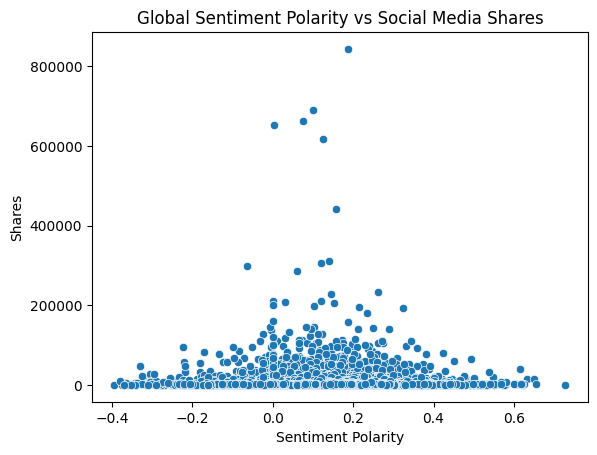

Correlation between sentiment and shares: 0.0041629290622772885


In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot between global sentiment polarity and shares
sns.scatterplot(x=data['global_sentiment_polarity'], y=data['shares'])
plt.title('Global Sentiment Polarity vs Social Media Shares')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Shares')
plt.show()

# Pearson correlation coefficient
correlation_sentiment_shares = data['global_sentiment_polarity'].corr(data['shares'])
print(f'Correlation between sentiment and shares: {correlation_sentiment_shares}')


**Engagement difference between articles published on weekends vs weekdays**

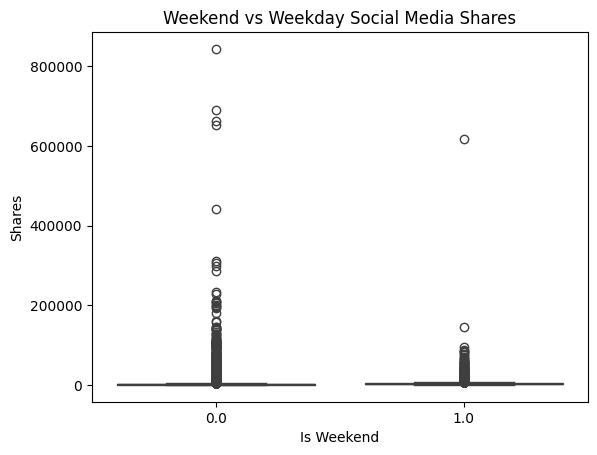

Average shares on weekends: 3903.3944123314063, on weekdays: 3318.855140186916


In [54]:
# Boxplot to compare weekend vs weekday shares
sns.boxplot(x=data['is_weekend'], y=data['shares'])
plt.title('Weekend vs Weekday Social Media Shares')
plt.xlabel('Is Weekend')
plt.ylabel('Shares')
plt.show()

# Grouping by weekend and getting average shares
avg_weekend_shares = data.groupby('is_weekend')['shares'].mean()
print(f'Average shares on weekends: {avg_weekend_shares[1]}, on weekdays: {avg_weekend_shares[0]}')

**Influence of videos in an article on company shares

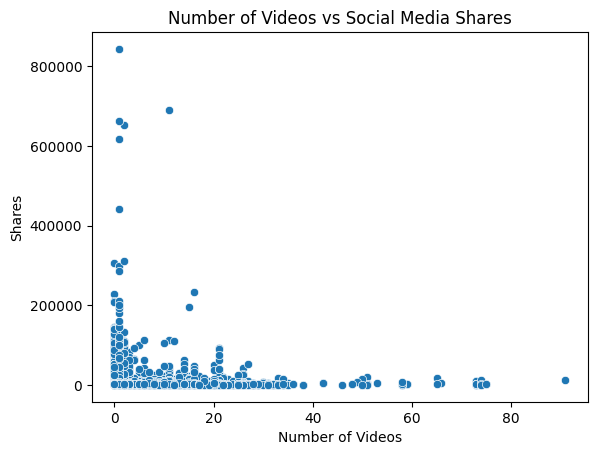

Correlation between number of videos and shares: 0.023936069530130995


In [56]:
# Correlation between number of videos and shares
sns.scatterplot(x=data['num_videos'], y=data['shares'])
plt.title('Number of Videos vs Social Media Shares')
plt.xlabel('Number of Videos')
plt.ylabel('Shares')
plt.show()

# Pearson correlation coefficient
correlation_videos_shares = data['num_videos'].corr(data['shares'])
print(f'Correlation between number of videos and shares: {correlation_videos_shares}')


**Analyze the distribution of shares across each day of the week to find which day performs best in terms of engagement.**

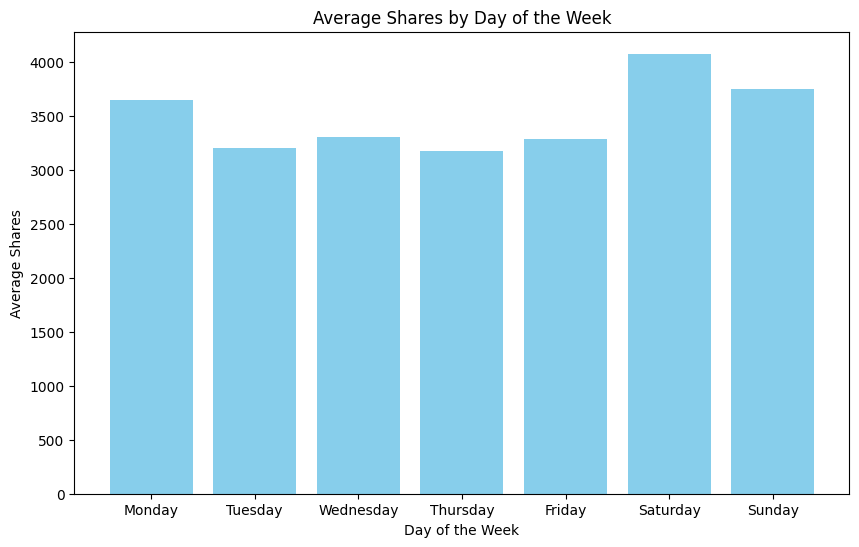

In [57]:


# Creating a dictionary to store average shares by day
days_of_week = {
    'Monday': data[data['weekday_is_monday'] == 1]['shares'].mean(),
    'Tuesday': data[data['weekday_is_tuesday'] == 1]['shares'].mean(),
    'Wednesday': data[data['weekday_is_wednesday'] == 1]['shares'].mean(),
    'Thursday': data[data['weekday_is_thursday'] == 1]['shares'].mean(),
    'Friday': data[data['weekday_is_friday'] == 1]['shares'].mean(),
    'Saturday': data[data['weekday_is_saturday'] == 1]['shares'].mean(),
    'Sunday': data[data['weekday_is_sunday'] == 1]['shares'].mean()
}

# Converting dictionary to DataFrame for easy plotting
days_df = pd.DataFrame(list(days_of_week.items()), columns=['Day', 'Average Shares'])

# Plotting the average shares by day of the week
plt.figure(figsize=(10, 6))
plt.bar(days_df['Day'], days_df['Average Shares'], color='skyblue')
plt.title('Average Shares by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Shares')
plt.show()


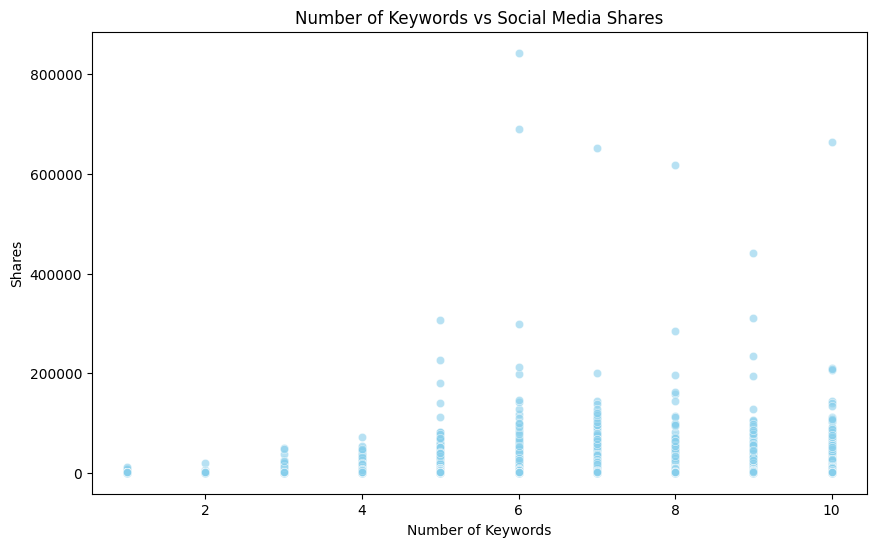

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check if 'num_keywords' column is available
if 'num_keywords' in data.columns:
    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data['num_keywords'], y=data['shares'], color='skyblue', alpha=0.6)
    plt.title('Number of Keywords vs Social Media Shares')
    plt.xlabel('Number of Keywords')
    plt.ylabel('Shares')
    plt.show()
else:
    print("'num_keywords' column is not available in the dataset.")


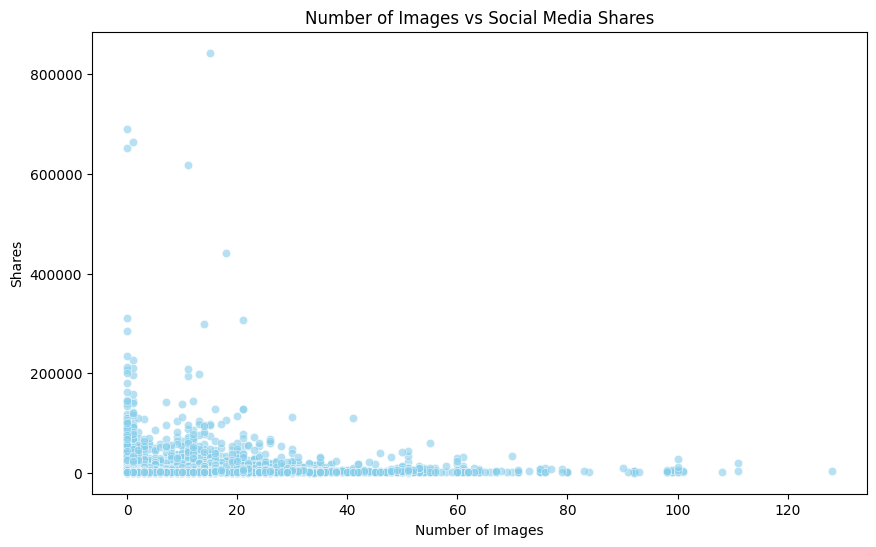

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Check if 'num_imgs' column is available
if 'num_imgs' in data.columns:
    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data['num_imgs'], y=data['shares'], color='skyblue', alpha=0.6)
    plt.title('Number of Images vs Social Media Shares')
    plt.xlabel('Number of Images')
    plt.ylabel('Shares')
    plt.show()
else:
    print("'num_imgs' column is not available in the dataset.")
